<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/market_taxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial 

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [41]:
def Demand(p):
  return 15 - 3*p**0.65

def Supply(p):
  return 2.5*p 

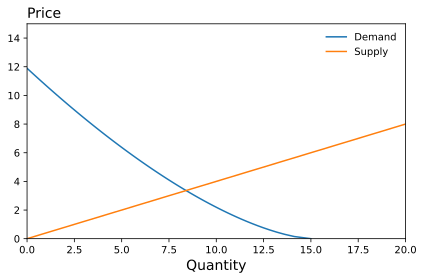

In [42]:
fig = plt.figure(dpi=300, tight_layout=True)
ps = jnp.linspace(0, 15, 100)
ds = jax.vmap(Demand)(ps)
ss = jax.vmap(Supply)(ps)
plt.plot(ds, ps, label='Demand') 
plt.plot(ss, ps, label='Supply')
plt.legend(frameon=False)
plt.xlim(0, 20)
plt.ylim(0, 15)
plt.title('Price', loc='left', size=14)
plt.xlabel('Quantity', size=14)
fig.savefig('eq1.png', format='png')
plt.show()

In [49]:
def f_root(x):
  qd, qs, pd, ps = x 
  return jnp.array([qd - Demand(pd), qs - Supply(ps), qd-qs, pd-ps])

In [50]:
def solver(f_root):

  g = lambda z: z - jnp.linalg.solve(jax.jacobian(f_root)(z), f_root(z))

  def body_fn(val):
    next_guess = g(val)
    return next_guess #jnp.array(jnp.maximum(next_guess[:-1], jnp.zeros(2)), next_guess[-1])

  def cond_fn(val):
    return jnp.linalg.norm(f_root(val)) > 1e-3

  z = jax.lax.while_loop(cond_fn, body_fn, init_val=jnp.ones(4))
  return z 

In [52]:
qd, qs, pd, ps = solver(f_root)

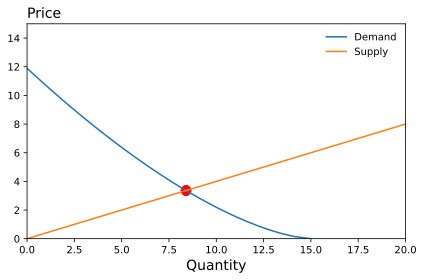

In [56]:
fig = plt.figure(dpi=300, tight_layout=True)
ps = jnp.linspace(0, 15, 100)
ds = jax.vmap(Demand)(ps)
ss = jax.vmap(Supply)(ps)
plt.plot(ds, ps, label='Demand') 
plt.plot(ss, ps, label='Supply')
plt.scatter(qd, pd, s=100, color='red')
plt.legend(frameon=False)
plt.xlim(0, 20)
plt.ylim(0, 15)
plt.title('Price', loc='left', size=14)
plt.xlabel('Quantity', size=14)
fig.savefig('eq2.png', format='png')
plt.show()

In [58]:
def f_root_tax(tax, x):
  qd, qs, pd, ps = x 
  return jnp.array([qd - Demand(pd), qs - Supply(ps), qd-qs, pd-tax-ps])

equilbriumq = lambda tax: solver(partial(f_root_tax, tax))[0]

In [63]:
ts = jnp.linspace(0., 3., 20)
qs = jax.vmap(equilbriumq)(ts)

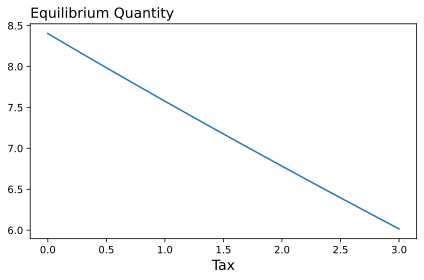

In [65]:
fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(ts, qs)
plt.title('Equilibrium Quantity', loc='left', size=14)
plt.xlabel('Tax', size=14)
fig.savefig('eq3.png', format='png')
plt.show()